In [2]:
import pandas as pd
import numpy as np
import StringIO
%matplotlib notebook
from matplotlib import pyplot as plt


In [3]:
fname = 'RGAdata_2019/gaslib/gaslib.dat'

In [4]:
names = []
ms = []
rs = []

with open(fname) as f:
    counter=0
    for x in f:
        counter=counter+1
        if (np.mod(counter,3) ==2):
            names.append(x.replace('"','').split(' ')[0])
        elif ((counter>1) & ((np.mod(counter,3) ==1))):
#             print x
            rs.append(np.genfromtxt(StringIO.StringIO(x), delimiter='\t'))
        elif ( ((np.mod(counter,3) ==0))):
#             print x
            ms.append(np.genfromtxt(StringIO.StringIO(x), delimiter='\t')[:-1])
                  
      

In [5]:
print len(rs)
print len(names)
print len(rs[0])
print len(ms[0])
print names

94
94
10
10
['Acetic', 'Acetone', 'Acetophenone', 'Acetylene', 'Air', 'Ammonia', 'Aniline', 'Anisole', 'Argon', 'Benzene', 'Benzoic', '1,3-Butadiene', 'Butane', 'Butanoic', '2-Butanone', 'Carbon', 'Carbon', 'C2HCl3', 'CCl4', 'CF4', 'CH2Cl2', 'CH3Cl', 'CH3F', 'CHCl3', 'Chlorobenzene', 'Cyclohexane', 'Cyclopentane', 'Diborane', 'Dimethyl', 'Dimethyl', 'DP', 'DP', 'DP', 'Ethane', 'Ethene', 'Ethyl', 'Ethyl', 'Ethylbenzene', 'Fluorobenzene', 'Formaldehyde', 'Formamide', 'Formic', 'H2S', 'Halocarbon', 'Halocarbon', 'Halocarbon', 'HBr', 'HCl', 'HCN', 'Helium', 'Heptane', 'Hexane', 'Hydrazine', 'Hydrogen', 'Krypton', 'm-Cresol', 'm-Xylene', 'Methane', 'Methanol', 'Methyl', 'Methylamine', 'MP', 'NO', 'NO2', 'N2O', 'Naphthalene', 'Neon', 'Nitrobenzene', 'Nitrogen', 'o-Xylene', 'o-Cresol', 'Octane', 'Oxygen', 'p-Xylene', 'p-Cresol', 'Pentane', 'Phenol', 'Phosgene', 'Phosphine', 'Propane', '1-Propanol', '2-Propanol', 'Propene', 'Propenoic', 'Propyne', 'Pyrrole', 'SF6', 'SiF4', 'SiH4', 'SO2', 'Tolu

In [6]:
df_m = pd.DataFrame([])
df_r = pd.DataFrame([])

for i in range(len (names)):
    df_m_i = pd.DataFrame([names[i], ms[i][0], ms[i][1], ms[i][2], ms[i][3], ms[i][4], ms[i][5], 
                           ms[i][6], ms[i][7], ms[i][8], ms[i][9]]).T
    df_r_i = pd.DataFrame([names[i], rs[i][0], rs[i][1], rs[i][2], rs[i][3], rs[i][4], rs[i][5], 
                           rs[i][6], rs[i][7], rs[i][8], rs[i][9]]).T
    df_m = df_m.append(df_m_i, ignore_index=True)
    df_r = df_r.append(df_r_i, ignore_index=True)
    
df_m.columns= ['name', 'm0','m1','m2','m3','m4','m5','m6','m7','m8','m9']
df_r.columns= ['name', 'r0','r1','r2','r3','r4','r5','r6','r7','r8','r9']

<IPython.core.display.Javascript object>


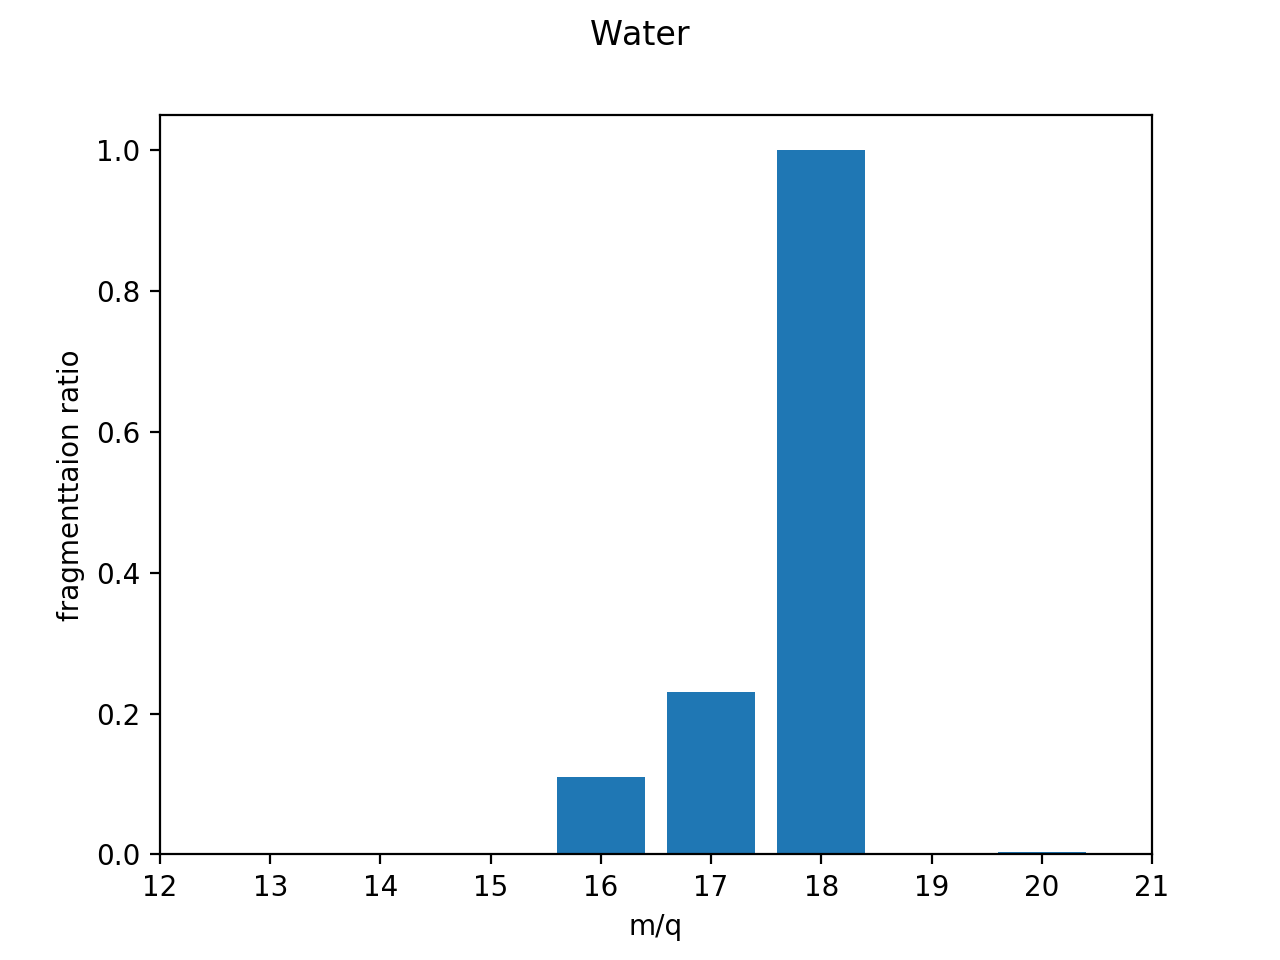

10
10


Text(0,0.5,'fragmenttaion ratio')

In [19]:
fig, ax = plt.subplots(1)
i = 92
print len(ms[i])
print len(rs[i])
fig.suptitle(names[i])
ax.bar(ms[i], rs[i]/100.)
ax.set_xlim(12,21)
ax.set_xlabel('m/q')
ax.set_ylabel('fragmenttaion ratio')
# fig.tight_layout()

In [24]:
print rs[i]
print rs[i][4]/rs[i][0]


[100.   23.   11.    0.3   0.1   0.    0.    0.    0.    0. ]
0.001


In [9]:
df_m[(df_m.name=='Nitrogen') | (df_m.name=='Argon') | (df_m.name=='Water')|
     (df_m.name=='Oxygen') | (df_m.name=='Neon')| (df_m.name=='Hydrogen')| (df_m.name=='Helium')]

,name,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9
8,Argon,40,20,36,38,18,0,0,0,0,0
49,Helium,4,0,0,0,0,0,0,0,0,0
53,Hydrogen,2,1,0,0,0,0,0,0,0,0
66,Neon,20,22,21,0,0,0,0,0,0,0
68,Nitrogen,28,14,29,0,0,0,0,0,0,0
72,Oxygen,32,16,34,33,0,0,0,0,0,0
92,Water,18,17,16,20,19,0,0,0,0,0


In [180]:
print np.array(df_m.name)

['Acetic' 'Acetone' 'Acetophenone' 'Acetylene' 'Air' 'Ammonia' 'Aniline'
 'Anisole' 'Argon' 'Benzene' 'Benzoic' '1,3-Butadiene' 'Butane' 'Butanoic'
 '2-Butanone' 'Carbon' 'Carbon' 'C2HCl3' 'CCl4' 'CF4' 'CH2Cl2' 'CH3Cl'
 'CH3F' 'CHCl3' 'Chlorobenzene' 'Cyclohexane' 'Cyclopentane' 'Diborane'
 'Dimethyl' 'Dimethyl' 'DP' 'DP' 'DP' 'Ethane' 'Ethene' 'Ethyl' 'Ethyl'
 'Ethylbenzene' 'Fluorobenzene' 'Formaldehyde' 'Formamide' 'Formic' 'H2S'
 'Halocarbon' 'Halocarbon' 'Halocarbon' 'HBr' 'HCl' 'HCN' 'Helium'
 'Heptane' 'Hexane' 'Hydrazine' 'Hydrogen' 'Krypton' 'm-Cresol' 'm-Xylene'
 'Methane' 'Methanol' 'Methyl' 'Methylamine' 'MP' 'NO' 'NO2' 'N2O'
 'Naphthalene' 'Neon' 'Nitrobenzene' 'Nitrogen' 'o-Xylene' 'o-Cresol'
 'Octane' 'Oxygen' 'p-Xylene' 'p-Cresol' 'Pentane' 'Phenol' 'Phosgene'
 'Phosphine' 'Propane' '1-Propanol' '2-Propanol' 'Propene' 'Propenoic'
 'Propyne' 'Pyrrole' 'SF6' 'SiF4' 'SiH4' 'SO2' 'Toluene' 'Turbopump'
 'Water' 'Xenon']


In [190]:
pd.DataFrame([], columns=['23{1:2}'])

,23{1:2}


In [45]:
df_m[df_m.m0==29]

,name,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9
39,Formaldehyde,29,30,28,15,14,13,12,31,0,0
41,Formic,29,46,45,17,28,44,16,12,13,30
79,Propane,29,28,27,44,43,39,41,26,15,42


In [30]:
df_r[df_m.m==26]

,name,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9
3,Acetylene,100,20,5.5,5.5,3,3,0.2,0.2,0,0
27,Diborane,100,96,95,57,46,28,24,18,0,0
